
En primer lugar, una corrección en el código para calcular números de Fibonacci elevando a potencias el número áureo: el resultado  que se obtiene usando $ceil$ o $floor$ puede tener un desfase de una unidad respecto al valor exacto. Se obtiene un resultado mejor usando $round$, que trunca el número decimal al entero más próximo. Como se ve en los ejemplos todavía hay que incrementar la precisión para obtener el resultado correcto. 

In [1]:
def fibonacci_num(n,d):
    phi2 = ((1+sqrt(5))/2).n(digits=d)
    return ((phi2^n-(1-phi2)^n)/(sqrt(5)).n(digits=d)).ceil()

In [2]:
print [fibonacci_num(10000,100*k)-fibonacci(10000) for k in srange(20,100)]

[-31348260365014917045045270404907938796072844462510306987135351860490222303931811493604497883, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1]


In [3]:
def fibonacci_num2(n,d):
    phi2 = ((1+sqrt(5))/2).n(digits=d)
    return ((phi2^n-(1-phi2)^n)/(sqrt(5)).n(digits=d)).round()

In [4]:
print [fibonacci_num2(10000,100*k)-fibonacci(10000) for k in srange(20,100)]

[-31348260365014917045045270404907938796072844462510306987135351860490222303931811493604497883, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [5]:
print [(2000+k,fibonacci_num2(10000,2000+k)==fibonacci(10000)) for k in srange(1,200)]

[(2001, False), (2002, False), (2003, False), (2004, False), (2005, False), (2006, False), (2007, False), (2008, False), (2009, False), (2010, False), (2011, False), (2012, False), (2013, False), (2014, False), (2015, False), (2016, False), (2017, False), (2018, False), (2019, False), (2020, False), (2021, False), (2022, False), (2023, False), (2024, False), (2025, False), (2026, False), (2027, False), (2028, False), (2029, False), (2030, False), (2031, False), (2032, False), (2033, False), (2034, False), (2035, False), (2036, False), (2037, False), (2038, False), (2039, False), (2040, False), (2041, False), (2042, False), (2043, False), (2044, False), (2045, False), (2046, False), (2047, False), (2048, False), (2049, False), (2050, False), (2051, False), (2052, False), (2053, False), (2054, False), (2055, False), (2056, False), (2057, False), (2058, False), (2059, False), (2060, False), (2061, False), (2062, False), (2063, False), (2064, False), (2065, False), (2066, False), (2067, Fa

Al incrementar el número de dígitos de precisión de uno en uno, empezando en $2000$, vemos  que parece haber un límite claro, para el número de Fibonacci de subíndice $10000$ situado en $2093$ dígitos de precisión, entre los resultados correctos y los incorrectos. Cuando la precisión es insuficiente  el valor aproximado obtenido puede tener, como en el caso calculado arriba con $2000$ dígitos de precisión,  pocas cifras correctas. 

El resultado de la celda 5 parece indicar que una vez que se alcanza una precisión que permite obtener el valor correcto del número de Fibonacci, se sigue obteniendo para precisiones mayores, lo que no deja de ser razonable pero no era cierto si se utilizaba $floor$ o $ceil$ en lugar de $round$. 
## Precisión óptima

Incrementamos el número de cifras de precisión $d$ de $100$ en $100$ y, para mayor seguridad, paramos cuando encontramos   $100$ valores consecutivos de $d$ para los que el valor aproximado es igual al valor exacto. Ésto es un bastante arbitrario, pero produce un resultado sistemático, en los rangos en los que podemos calcular,  en el que el valor óptimo de $d$ para calcular $F_n$ es del orden de $n/5.$ 

Este cálculo está hecho en una máquina con dos procesadores de diez núcleos cada uno. 

In [73]:
nucl = 20

def fibonacci_num2(n,d):
    phi2 = ((1+sqrt(5))/2).n(digits=d)
    return ((phi2^n-(1-phi2)^n)/(sqrt(5)).n(digits=d)).round()



def generar_lista(N1,N2,k,nucl):
    L = [[] for muda in range(nucl)]
    for n in xsrange(N1,N2,k):
        r = n%nucl
        if L[r] == []:
            L[r]=[n]
        else:
            L[r] += [n]
    return L


@parallel(nucl)
def precision(L):
    L1 = []
    d = 100
    for n in L:
        cont = 0
        while cont < 100:
            d1 = 0
            cont += 1
            fibn = fibonacci(n)
            if fibonacci_num2(n,d+d1) - fibn != 0:
                cont = 0
                d += 100
            d1 += 1
        L1.append((n,d))
    return L1




L = generar_lista(10**4,10**5,next_prime(1000),nucl)

%time LL = list(precision([L[j] for j in srange(nucl)]))


CPU times: user 8 ms, sys: 196 ms, total: 204 ms
Wall time: 43.4 s


In [74]:
L3 = LL[0][1]
for j in srange(1,20):
    L3 += LL[j][1]
L3.sort()
print L3

[(10000, 2100), (11009, 2400), (12018, 2600), (13027, 2800), (14036, 3000), (15045, 3200), (16054, 3400), (17063, 3600), (18072, 3800), (19081, 4000), (20090, 4300), (21099, 4500), (22108, 4700), (23117, 4900), (24126, 5100), (25135, 5300), (26144, 5500), (27153, 5700), (28162, 5900), (29171, 6100), (30180, 6400), (31189, 6600), (32198, 6800), (33207, 7000), (34216, 7200), (35225, 7400), (36234, 7600), (37243, 7800), (38252, 8000), (39261, 8300), (40270, 8500), (41279, 8700), (42288, 8900), (43297, 9100), (44306, 9300), (45315, 9500), (46324, 9700), (47333, 9900), (48342, 10200), (49351, 10400), (50360, 10600), (51369, 10800), (52378, 11000), (53387, 11200), (54396, 11400), (55405, 11600), (56414, 11800), (57423, 12100), (58432, 12300), (59441, 12500), (60450, 12700), (61459, 12900), (62468, 13100), (63477, 13300), (64486, 13500), (65495, 13700), (66504, 14000), (67513, 14200), (68522, 14400), (69531, 14600), (70540, 14800), (71549, 15000), (72558, 15200), (73567, 15400), (74576, 15600

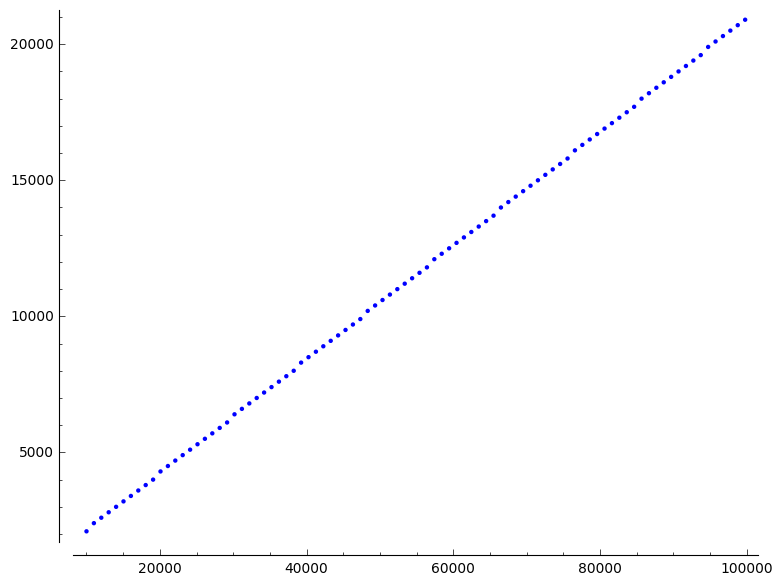

In [75]:
point(L3)

In [76]:
var('a b');model(x)=a*x+b

In [77]:
find_fit(L3,model)

[a == 0.2089618343317644, b == 54.55748084105385]

## ¿Qué fórmula debemos usar?

Según la fórmula de Binet para $n$ impar el número de Fibonacci $F_n$ es mayor que $\phi^n/\sqrt{5}$,  mientras que para $n$ par el número de Fibonacci es menor. En los dos casos la contribución de $(1-\phi)^n/\sqrt{5}$ es tan pequeña que que el número de Fibonacci se obtiene aplicando $round$ a $(\phi^n/\sqrt{5})-((1-\phi)^n/\sqrt{5})$ o bien a $\phi^n/\sqrt{5}$.

In [2]:
phi2 = ((1+sqrt(5))/2).n(digits=10000)
print (phi2^40003)/(sqrt(5)).n(digits=10000)

6.06859168545671803561940314733963010465151214112605221186576704171617676476558901824240805526327489716875737443740916506739193672991067885528780107901211091750544664874263593418933174008668242089326137255605927463916077173368543636759370459278689215970212854380178025414702894897722224547327206926326175105339610923271191104752327383867590111423507729603508899745731249802879066262452651026938627809207154875131701366545458965000720172618572853024228377922909726198902982875680101718301129533899983391672958931280506300123736580751369495874278173269581698896896263945288293886222428730208227555529183721620991083509615781539828720099422579929426736054095399056495604274383511595312972228717100193667048098455559809683760800584467911340074278968347841496714223783939512022069470742212523654678166376117835090686723331160520752479067000420108196695532259618402345217727634506381582858254573670486622960019279660463501353389903620113331973164177044711470824315855773822318130930797795299542323960747161

In [3]:
phi2 = ((1+sqrt(5))/2).n(digits=10000)
print ((1-phi2)^40003)/(sqrt(5)).n(digits=10000)

-3.2956575490042734285795850795800510122744134417844273536101817773712337579979548545141685374617750829907632490310188649909148695903630713401911671474189091889660065752303521814436059295925597727741022330077035001175950233833821415088782059989860583251061823468390412468183359345246898696767562431768334829032358731231066670643032273153267393640933793782185020019309319505836244881289998690669073165914404332585543186413886105378796924499789176014726222022571050815144815804656487310130613596255120213520578102227617734430786768009069164754698887562371841878435523719696465991849505359212275550644252598853645421890745984677460713123578912964606843912044913329943520523949031405616948371177280616843761649367692150910710781789852666502705718888129459633458752954723487759897302659569486658609727660769092533847572941540396814871088577643746733326442441148634253947789168976830149080804270999917862566560768585634627097986282498035089056036069920844551224881408125130350626840800610246699046985941732

In [4]:
fibonacci(40003)

6068591685456718035619403147339630104651512141126052211865767041716176764765589018242408055263274897168757374437409165067391936729910678855287801079012110917505446648742635934189331740086682420893261372556059274639160771733685436367593704592786892159702128543801780254147028948977222245473272069263261751053396109232711911047523273838675901114235077296035088997457312498028790662624526510269386278092071548751317013665454589650007201726185728530242283779229097261989029828756801017183011295338999833916729589312805063001237365807513694958742781732695816988968962639452882938862224287302082275555291837216209910835096157815398287200994225799294267360540953990564956042743835115953129722287171001936670480984555598096837608005844679113400742789683478414967142237839395120220694707422125236546781663761178350906867233311605207524790670004201081966955322596184023452177276345063815828582545736704866229600192796604635013533899036201133319731641770447114708243158557738223181309307977952995423239607471615

Vemos bastante bien en este cálculo lo que está pasando: la parte entera del resultado de la primera celda de este bloque es el número de Fibonacci $F_{40003}$ y después del punto decimal hay un montón de ceros y $3$ cifras distintas de cero ($122$). Este resultado "contradice ligeramente" la fórmula de Binet, ya que debería ser menor que el número de Fibonacci. 

Sin embargo, la contribución, negativa, de la segunda celda únicamente afecta a las tres últimas cifras $122$ en el cálculo de la primera celda. Podemos atribuir la contradicción mencionada a los errores de redondeo, y el resultado correcto de la primera celda debería ser $....87699999999999999........$, y por tanto más pequeño que el valor verdadero del número de Fibonacci $....877$. Esto explica que en ocasiones podemos calcular un $F_n$ con $n$ impar usando $floor$, que según la fórmula de Binet no debería ser posible. 

## ¿Es realmente óptima la cota $n/5$?

Observando los ejemplos anteriores parece claro que como mínimo necesitamos $8359$ dígitos de precisión, y resulta que este número es el logaritmo en base $10$ de $40003$. 

In [1]:
log(fibonacci(40003),base=10).n(digits=100)

8359.783087917731277569798255217291585662221069388923828702775532311175199537670089154360986133343765

Sin embargo, para esta cota inferior necesitamos conocer el valor de $fibonacci(40003)$, luego no es muy útil. 